In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

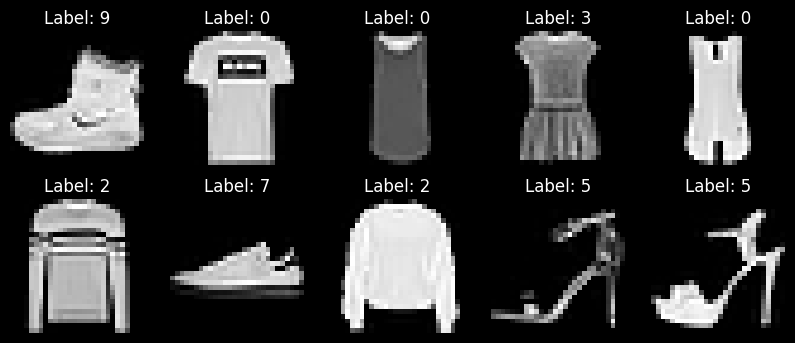

In [3]:
(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data() # load model to train and test data
# Normalize the images to the range [0, 1]

fig, axs = plt.subplots(2, 5, figsize=(10, 4))
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(train_imgs[i], cmap='gray')
    axs[i].set_title(f'Label: {train_labels[i]}')
    axs[i].axis('off')

plt.show()

In [4]:
print(train_labels[:10])

[9 0 0 3 0 2 7 2 5 5]


### Labelling 

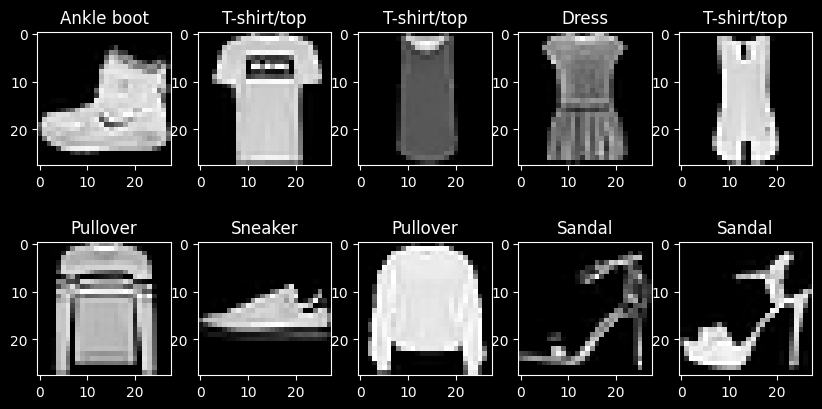

In [5]:
idx2label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Tiến hành trực quan hóa lại với tên nhãn.
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (10, 5))
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(train_imgs[i], cmap = 'gray')
    axs[i].set_title(idx2label[train_labels[i]])
plt.show()

In [6]:
img1 = train_imgs[0]
shape_img1 = img1.shape
print(f" pixel metric of picture 1: {shape_img1}")
print(f" maximum pixel value of picture 1: {np.max(img1)}")
print(f" minimum pixel value of picture 1: {np.min(img1)}")

 pixel metric of picture 1: (28, 28)
 maximum pixel value of picture 1: 255
 minimum pixel value of picture 1: 0


In [7]:
train_imgs = train_imgs / 255.0 # Normalize the images to the range [0, 1],    Since the pixel values are in the range [0, 255], we divide by 255.0 to scale them to [0, 1].
test_imgs = test_imgs / 255.0


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.nn import relu, softmax


model = Sequential()


model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\phath\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
history = model.fit(train_imgs, train_labels, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7811 - loss: 0.6312
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8614 - loss: 0.3859
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8768 - loss: 0.3387
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8828 - loss: 0.3173
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8920 - loss: 0.2944


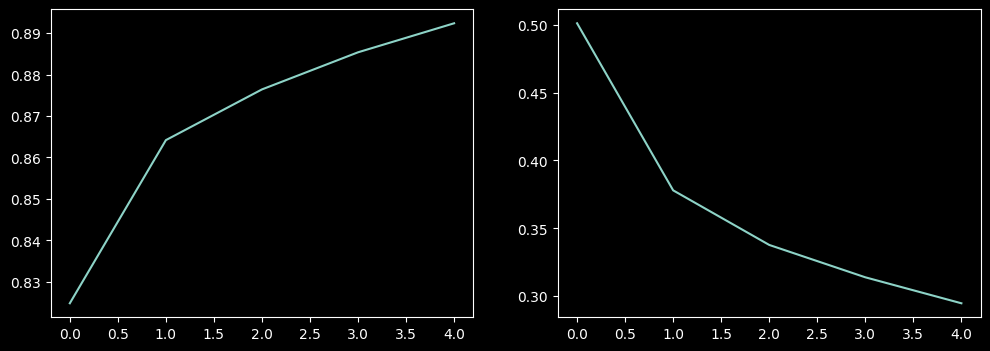

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(history.history['accuracy'], label='Train Accuracy')
axs[1].plot(history.history['loss'], label='Train Loss')

In [11]:
train_acc = history.history['accuracy'][-1]
print(f"Train accuracy: {train_acc:.4f}")
train_loss = history.history['loss'][-1]
print(f"Train loss: {train_loss:.4f}")

Train accuracy: 0.8924
Train loss: 0.2948


In [12]:
result2 = model.evaluate(test_imgs, test_labels)
print(f"Evaluation result: {result2}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8673 - loss: 0.3659  
Evaluation result: [0.368847131729126, 0.8652999997138977]
